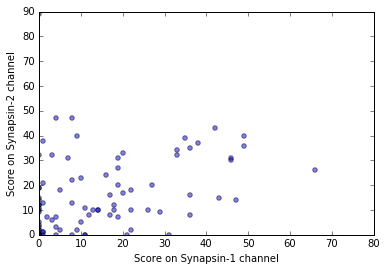

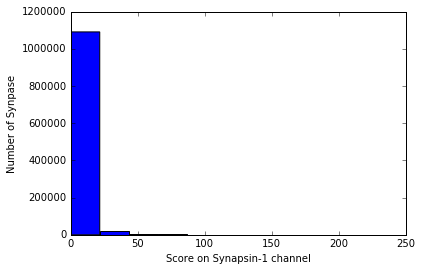

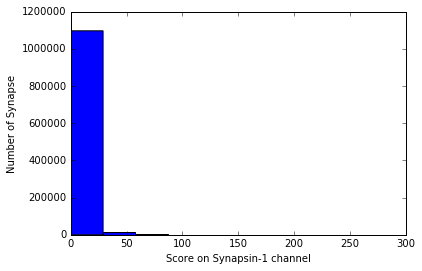

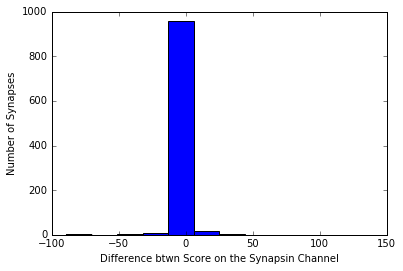

In [89]:
import scipy.io as sio
import matplotlib.pyplot as plt
%matplotlib inline


syn_positions = sio.loadmat('new_positions_data.mat')['syn']
sub_sample = np.random.permutation(len(syn_positions[:,0]))[1:1000]
synapsin1 = syn_positions[:,0].astype(float)
synapsin2 = syn_positions[:,1].astype(float)


plt.scatter(synapsin1[sub_sample], synapsin2[sub_sample], alpha=0.5)
plt.xlabel("Score on Synapsin-1 channel")
plt.ylabel("Score on Synapsin-2 channel")
plt.axis([0, 80, 0, 90])
plt.show()

plt.hist(synapsin1)
plt.xlabel("Score on Synapsin-1 channel")
plt.ylabel("Number of Synpase")

plt.show()

plt.hist(synapsin2)
plt.xlabel("Score on Synapsin-1 channel")
plt.ylabel("Number of Synapse")

plt.show()

plt.hist(synapsin1[sub_sample] - synapsin2[sub_sample])
plt.ylabel("Number of Synapses")
plt.xlabel("Difference btwn Score on the Synapsin Channel")
plt.show()


With a more relaxed scoring for each synpase on the synpasin-1 and synapsin-2 raw images, we plot the score for each synpase across the two channels as a scatter plot. The scores between each channel do not correlate that much.

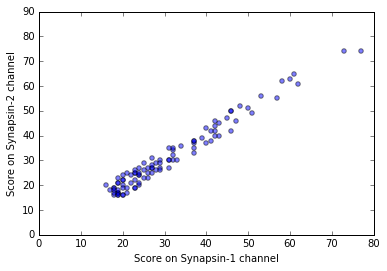

In [96]:
filter = (abs(synapsin1 - synapsin2) < 5) & (synapsin1 > 15) & (synapsin2 > 15)


synapsin1_sub = synapsin1[filter]
synapsin2_sub = synapsin2[filter]

sub_sample = np.random.permutation(len(synapsin1_sub))[1:100]

plt.scatter(synapsin1_sub[sub_sample], synapsin2_sub[sub_sample], alpha=0.5)
plt.xlabel("Score on Synapsin-1 channel")
plt.ylabel("Score on Synapsin-2 channel")
plt.axis([0, 80, 0, 90])
plt.show()


We propose to build a filter that only keeps the synapse where the score for each of them based on the raw image across the two synapsin channel is consistent.

In [56]:
import pickle
raw_data = pickle.load(open('raw_data'))

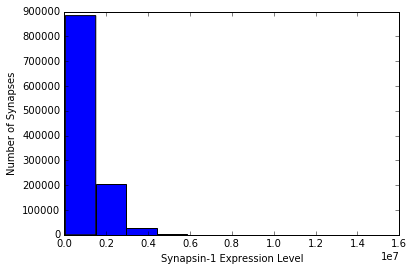

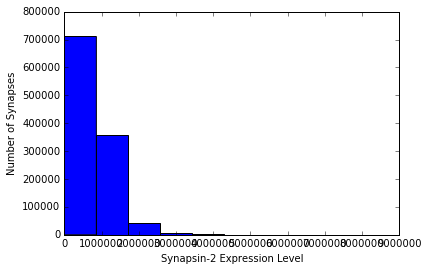

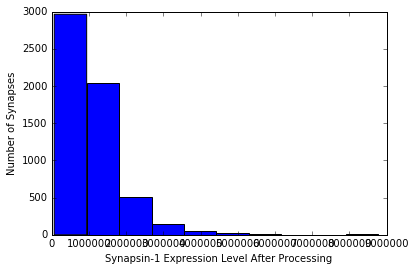

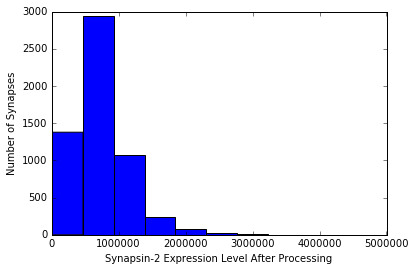

In [97]:
synapsin1_raw = np.array(raw_data[1])[0:1119259]
synapsin2_raw = np.array(raw_data[2])[0:1119259]
#sub_sample = np.random.permutation(len(synapsin2_raw))[1:1000]
plt.hist(synapsin1_raw)
plt.ylabel("Number of Synapses")
plt.xlabel("Synapsin-1 Expression Level")
plt.show()

plt.hist(synapsin2_raw)
plt.ylabel("Number of Synapses")
plt.xlabel("Synapsin-2 Expression Level")
plt.show()

filter = (abs(synapsin1 - synapsin2) < 5) & (synapsin1 > 15) & (synapsin2 > 15)
synapsin1_processed = synapsin1_raw[filter]
synapsin2_processed = synapsin2_raw[filter]
#sub_sample = np.random.permutation(len(synapsin2_processed))[1:1000]
plt.hist(synapsin1_processed)
plt.ylabel("Number of Synapses")
plt.xlabel("Synapsin-1 Expression Level After Processing")
plt.show()

plt.hist(synapsin2_processed)
plt.ylabel("Number of Synapses")
plt.xlabel("Synapsin-2 Expression Level After Processing")
plt.show()




The filter Based on the histograms shown above, most of the called synpases with relatively high synapsin expressions only have a high expression shown in either one of the synapsin channels. Those synpases are filtered out tentaviely. 

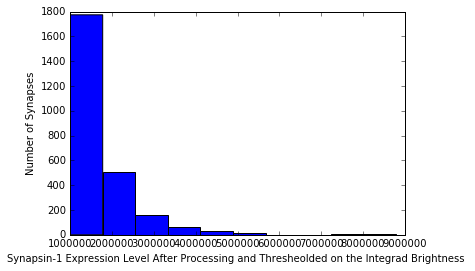

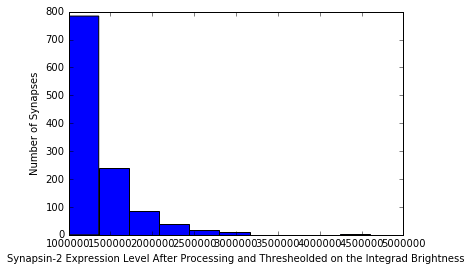

In [101]:
synapsin1_processed_filtered = synapsin1_processed[synapsin1_processed > 1000000 ]
synapsin2_processed_filtered = synapsin2_processed[synapsin2_processed > 1000000 ] 
plt.hist(synapsin1_processed_filtered)
plt.ylabel("Number of Synapses")
plt.xlabel("Synapsin-1 Expression Level After Processing and Thresheolded on the Integrad Brightness ")
plt.show()

plt.hist(synapsin2_processed_filtered)
plt.ylabel("Number of Synapses")
plt.xlabel("Synapsin-2 Expression Level After Processing and Thresheolded on the Integrad Brightness")
plt.show()

Also Thresholded on Integrated Brightness